In [1]:
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
import numpy as np
import arviz as az 

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1 Modeling prior predictive distribution
#### Parameters of the beta distribution with mean = 0.2 [LINK](https://statisticsbyjim.com/probability/beta-distribution/)


In [2]:
model = CmdStanModel(stan_file='code_1.stan')
samples = model.sample(data={'N': 50}, fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains=1)

INFO:cmdstanpy:compiling stan file /home/lab3/code_1.stan to exe file /home/lab3/code_1
INFO:cmdstanpy:compiled model executable: /home/lab3/code_1
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [3]:
df = samples.draws_pd()
df.head()

,lp__,accept_stat__,N,p,y
0,0.0,0.0,50.0,0.569444,30.0
1,0.0,0.0,50.0,0.223305,10.0
2,0.0,0.0,50.0,0.238001,10.0
3,0.0,0.0,50.0,0.364096,18.0
4,0.0,0.0,50.0,0.205858,9.0


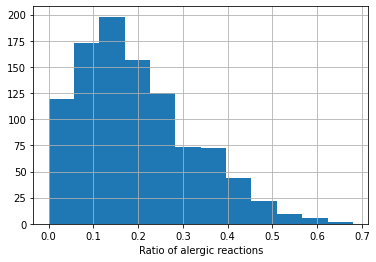

In [4]:
plt.hist(df['y']/df['N'], bins=12)
plt.xlabel("Ratio of alergic reactions")
plt.grid()
plt.show()

In [5]:
mean_of_the_ratio = np.mean(df['y']/df['N'])
mean_of_the_ratio

0.19474

## 2 Modeling posterior and posterior predictive distribution

In [6]:
model2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:compiling stan file /home/lab3/code_2.stan to exe file /home/lab3/code_2
INFO:cmdstanpy:compiled model executable: /home/lab3/code_2


In [7]:
samples = model2.sample(data={'N': 50, 'y': 7})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [8]:
df = samples.draws_pd()
df.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-25.7595,1.000000,1.17557,2.0,3.0,0.0,26.0210,0.112079,0.0
1,-26.7855,0.796346,1.17557,2.0,3.0,0.0,28.2693,0.238134,17.0
2,-25.7906,0.488945,1.17557,2.0,3.0,0.0,29.0948,0.110747,7.0
3,-25.3974,1.000000,1.17557,1.0,3.0,0.0,25.6831,0.138104,8.0
4,-25.9187,0.893455,1.17557,1.0,3.0,0.0,25.9353,0.105809,4.0


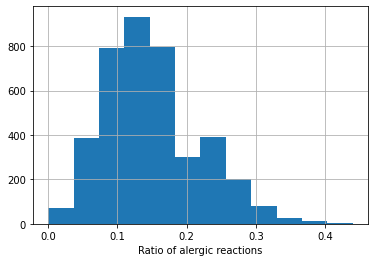

In [9]:
plt.hist(df['y_pred']/50, bins=12)
plt.xlabel("Ratio of alergic reactions")
plt.grid()
plt.show()

In [10]:
y_pred_mean = np.mean(df['y_pred']/50)
y_pred_hdi = az.hdi(df['y_pred'].to_numpy()/50, hdi_prob=0.94)

p_mean = np.mean(df['p'])
p_hdi = az.hdi(df['p'].to_numpy(), hdi_prob=0.94)

print(f"Expected value of the predicted value = {y_pred_mean}, 94% density interval = {y_pred_hdi}")
print(f"Expected value of the parameter p = {p_mean}, 94% density interval = {p_hdi}")

Expected value of the predicted value = 0.14886000000000002, 94% density interval = [0.02 0.26]
Expected value of the parameter p = 0.14981010104999998, 94% density interval = [0.0651956 0.233542 ]


In [11]:
probability = np.mean((df['y_pred']/50) < 0.2)
print(f'Probability that ratio is lower than the average probability from tradicional vaccines = {probability}', )

Probability that ratio is lower than the average probability from tradicional vaccines = 0.745
